#### Question 9
Train An SVM classifier on the MNIST data set. Since SVM classifier are binary classifiers. You will need to use one VS the rest to classify or 10 digits. You may want to tune the hyper parameters using small validation set to speed up the process. What accuracy can you reach?

In [ ]:
%pip install scikit-learn pandas numpy scikit-learn-intelex matplotlib #tensorflow[and-cuda]

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# import tensorflow as tf
# print(len(tf.config.list_physical_devices('GPU')) > 0)
# print(tf.config.list_physical_devices('GPU'))

In [2]:
from sklearnex import patch_sklearn
patch_sklearn()

Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [4]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

In [5]:
#Split this dataset into X_train, X_val, and X_test
X_train, X_temp, y_train, y_temp = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [6]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Hyperparameter tuning (using a small subset for speed)
param_grid = {'C': [0.01, 0.1, 1.0, 10.0]}
best_accuracy = 0
best_C = 0

In [8]:
for C in param_grid['C']:
    svm = LinearSVC(random_state=42, max_iter=1000, C=C, multi_class='ovr')
    svm.fit(X_train_scaled, y_train)
    val_pred = svm.predict(X_val_scaled)
    accuracy = accuracy_score(y_val, val_pred)
    print(f'Validation accuracy for C={C}: {accuracy:.4f}')
    print(f'Predicted labels: {val_pred} vs {y_val}')
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_C = C

Validation accuracy for C=0.01: 0.9095
Predicted labels: [9 1 5 ... 9 0 8] vs [9 1 5 ... 9 0 8]


e:\AI\ai-ml-course\.venv\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Validation accuracy for C=0.1: 0.9080
Predicted labels: [9 1 5 ... 9 0 8] vs [9 1 5 ... 9 0 8]


e:\AI\ai-ml-course\.venv\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Validation accuracy for C=1.0: 0.9087
Predicted labels: [9 1 5 ... 9 0 8] vs [9 1 5 ... 9 0 8]
Validation accuracy for C=10.0: 0.9092
Predicted labels: [9 1 5 ... 9 0 8] vs [9 1 5 ... 9 0 8]


e:\AI\ai-ml-course\.venv\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [9]:
# Train final model with best C on full training set
final_svm = LinearSVC(random_state=42, max_iter=1000, C=best_C, multi_class='ovr')
final_svm.fit(X_train_scaled, y_train)

,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,0.01
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,42


In [10]:
# Evaluate on test set
test_pred = final_svm.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, test_pred)

In [11]:

print(f"Best C: {best_C}")
print(f"Validation Accuracy: {best_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Best C: 0.01
Validation Accuracy: 0.9095
Test Accuracy: 0.9117


-----

In [12]:
# Add these imports to your existing code
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("tab10")

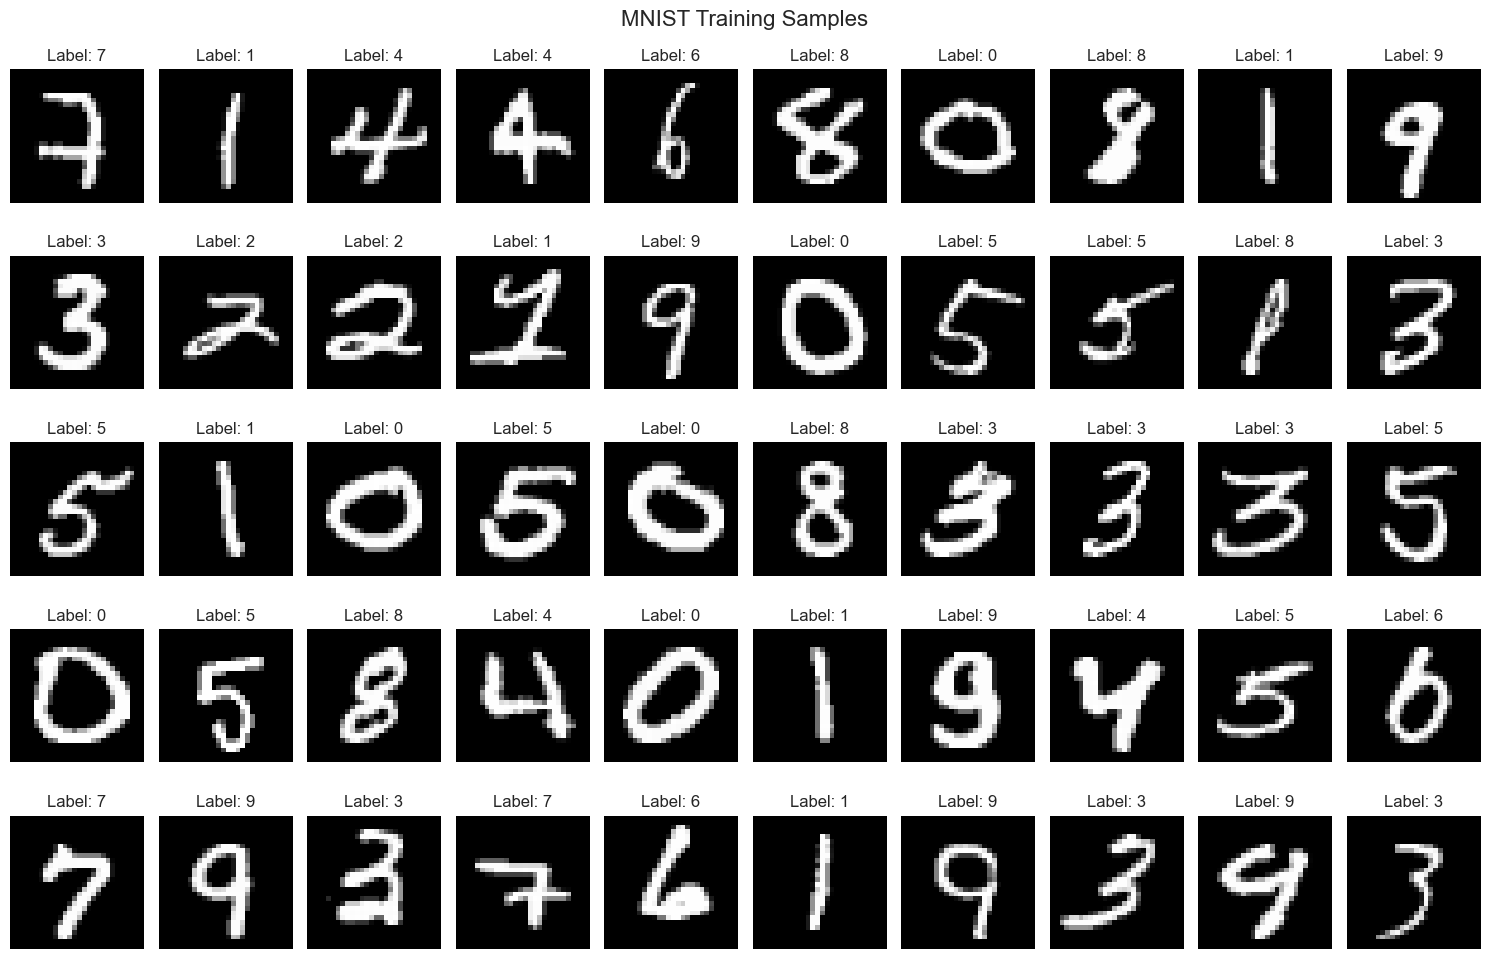

In [13]:
# 1. Visualize the MNIST dataset samples
def plot_mnist_samples(X, y, title="MNIST Samples", n_samples=100):
    """Plot random samples from MNIST dataset"""
    plt.figure(figsize=(15, 10))
    indices = np.random.choice(len(X), n_samples, replace=False)
    
    for i, idx in enumerate(indices[:50]):  # Show first 50 samples
        plt.subplot(5, 10, i + 1)
        plt.imshow(X[idx].reshape(28, 28), cmap='gray')
        plt.title(f'Label: {y[idx]}')
        plt.axis('off')
    
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Plot samples from training set
plot_mnist_samples(X_train, y_train, "MNIST Training Samples")

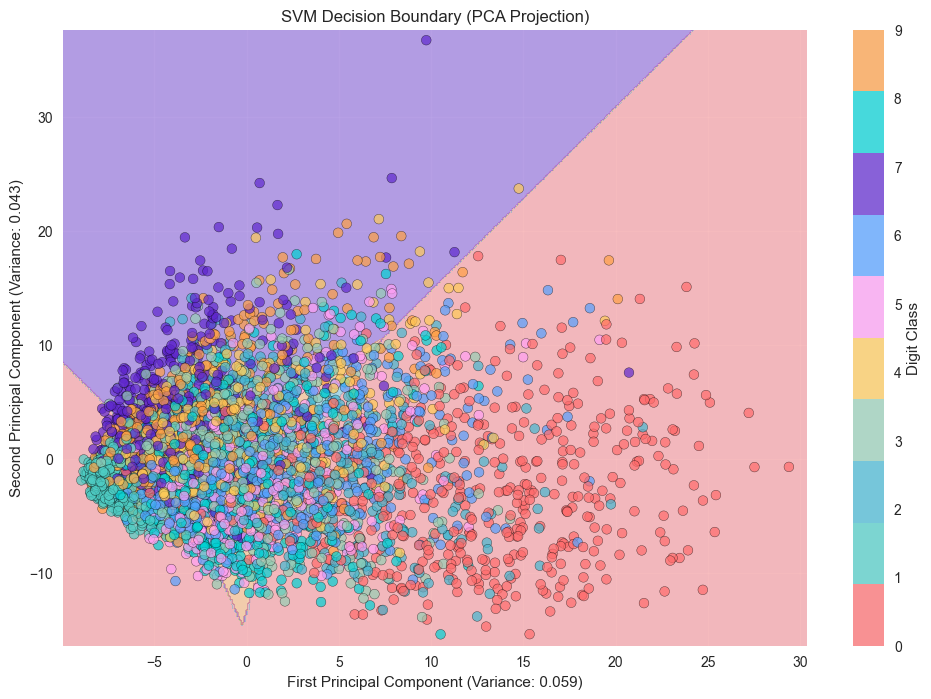

In [14]:
# 2. PCA Visualization of Decision Boundaries
def plot_pca_decision_boundary(X, y, classifier, title="SVM Decision Boundary (PCA)"):
    """Plot decision boundary using PCA for dimensionality reduction"""
    # Reduce to 2D using PCA
    pca = PCA(n_components=2, random_state=42)
    X_pca = pca.fit_transform(X)
    
    # Train classifier on PCA-reduced data
    clf_pca = LinearSVC(random_state=42, max_iter=1000, C=best_C, multi_class='ovr')
    clf_pca.fit(X_pca, y)
    
    # Create decision boundary plot
    plt.figure(figsize=(12, 8))
    
    # Create a mesh for decision boundary
    h = 0.1
    x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
    y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Predict on mesh
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    Z = clf_pca.predict(mesh_points)
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57', 
              '#FF9FF3', '#54A0FF', '#5F27CD', '#00D2D3', '#FF9F43']
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap)
    
    # Plot data points
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=cmap, 
                         edgecolors='black', alpha=0.7)
    plt.colorbar(scatter, label='Digit Class')
    plt.xlabel(f'First Principal Component (Variance: {pca.explained_variance_ratio_[0]:.3f})')
    plt.ylabel(f'Second Principal Component (Variance: {pca.explained_variance_ratio_[1]:.3f})')
    plt.title(title)
    plt.grid(True, alpha=0.3)
    plt.show()
    
    return pca, clf_pca

# Plot PCA decision boundary (use a subset for faster computation)
subset_size = 5000
subset_indices = np.random.choice(len(X_train_scaled), subset_size, replace=False)
X_subset = X_train_scaled[subset_indices]
y_subset = y_train[subset_indices]

pca_model, svm_pca = plot_pca_decision_boundary(X_subset, y_subset, 
                                               final_svm, "SVM Decision Boundary (PCA Projection)")

Computing t-SNE... This may take a few minutes...


e:\AI\ai-ml-course\.venv\lib\site-packages\daal4py\sklearn\manifold\_t_sne.py:365: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


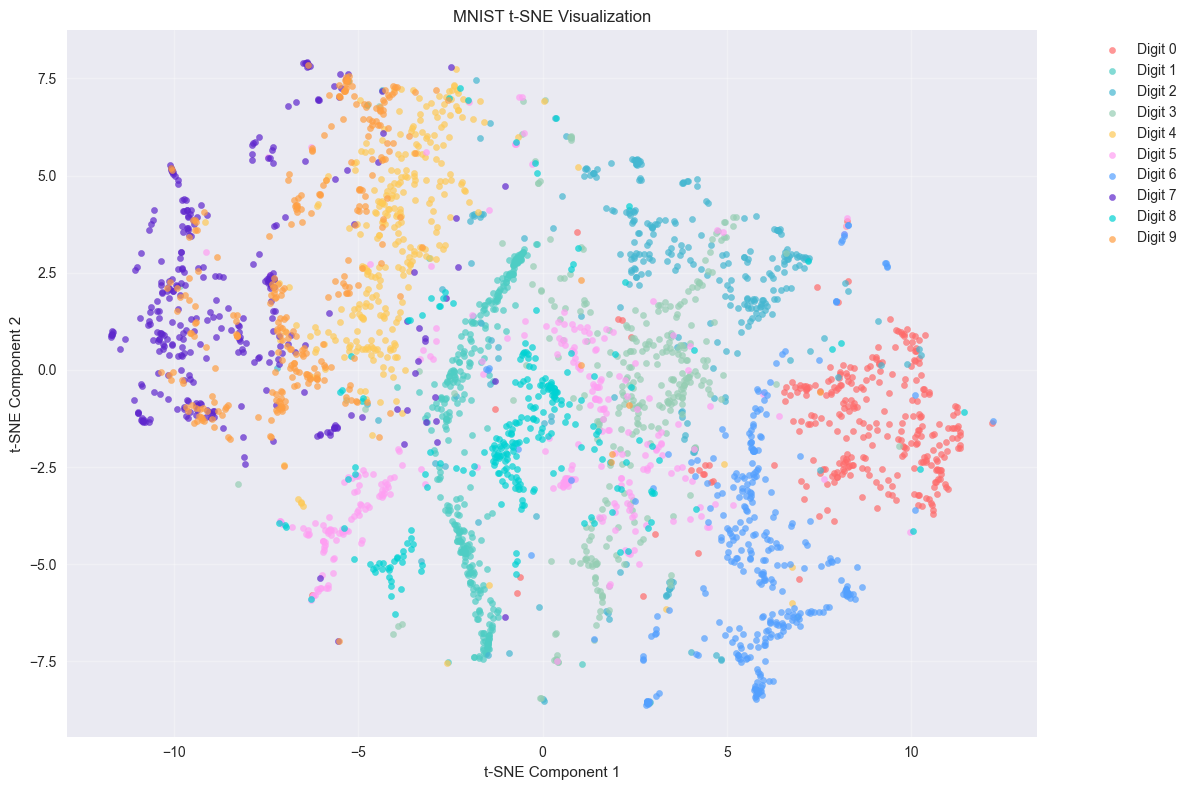

In [15]:
# 3. t-SNE Visualization
def plot_tsne_visualization(X, y, title="MNIST t-SNE Visualization", n_samples=3000):
    """Plot t-SNE visualization of MNIST data"""
    # Use subset for t-SNE (it's computationally expensive)
    indices = np.random.choice(len(X), n_samples, replace=False)
    X_sample = X[indices]
    y_sample = y[indices]
    
    # Apply t-SNE
    print("Computing t-SNE... This may take a few minutes...")
    tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=300)
    X_tsne = tsne.fit_transform(X_sample)
    
    # Plot t-SNE
    plt.figure(figsize=(12, 8))
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57', 
              '#FF9FF3', '#54A0FF', '#5F27CD', '#00D2D3', '#FF9F43']
    
    for digit in range(10):
        mask = y_sample == digit
        plt.scatter(X_tsne[mask, 0], X_tsne[mask, 1], 
                   c=colors[digit], label=f'Digit {digit}', alpha=0.7, s=20)
    
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.title(title)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Plot t-SNE visualization
plot_tsne_visualization(X_train_scaled, y_train)

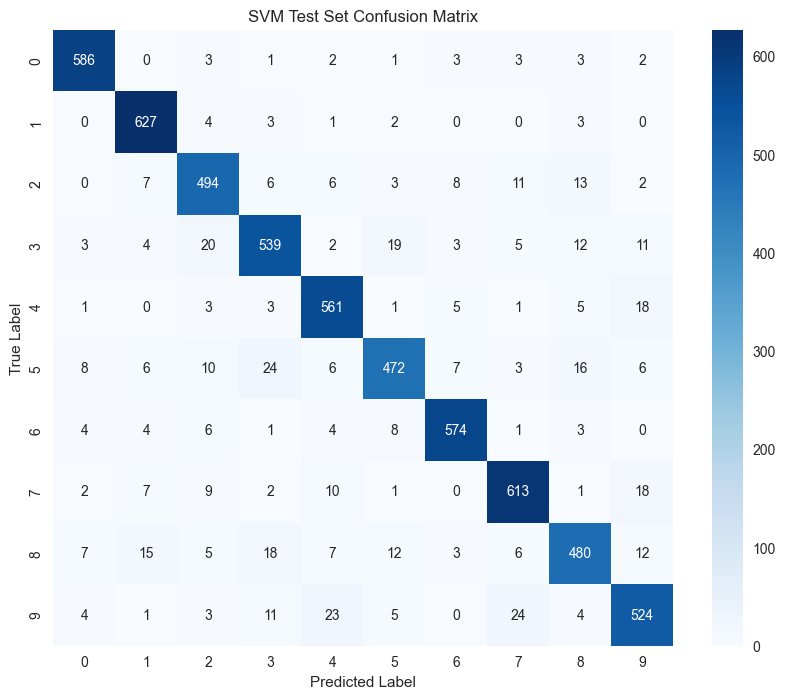


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       604
           1       0.93      0.98      0.96       640
           2       0.89      0.90      0.89       550
           3       0.89      0.87      0.88       618
           4       0.90      0.94      0.92       598
           5       0.90      0.85      0.87       558
           6       0.95      0.95      0.95       605
           7       0.92      0.92      0.92       663
           8       0.89      0.85      0.87       565
           9       0.88      0.87      0.88       599

    accuracy                           0.91      6000
   macro avg       0.91      0.91      0.91      6000
weighted avg       0.91      0.91      0.91      6000



In [16]:
# 4. Confusion Matrix Visualization
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    """Plot confusion matrix"""
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=range(10), yticklabels=range(10))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()
    
    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

# Plot confusion matrix for test predictions
plot_confusion_matrix(y_test, test_pred, "SVM Test Set Confusion Matrix")

e:\AI\ai-ml-course\.venv\lib\site-packages\sklearn\utils\parallel.py:29: UserWarning: `sklearn.utils.parallel.Parallel` needs to be used in conjunction with `sklearn.utils.parallel.delayed` instead of `joblib.delayed` to correctly propagate the scikit-learn configuration to the joblib workers.
  warnings.warn(


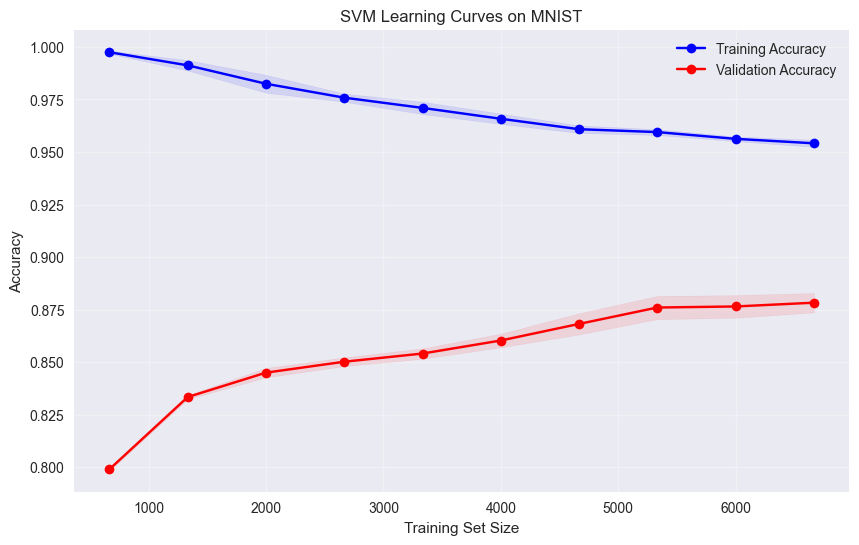

In [17]:
# 5. Learning Curves
from sklearn.model_selection import learning_curve

def plot_learning_curves(estimator, X, y, title="Learning Curves"):
    """Plot learning curves to analyze model performance"""
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=3, n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='accuracy'
    )
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Accuracy')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, 
                     alpha=0.1, color='blue')
    
    plt.plot(train_sizes, val_mean, 'o-', color='red', label='Validation Accuracy')
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, 
                     alpha=0.1, color='red')
    
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Plot learning curves (using subset for speed)
subset_size = 10000
subset_indices = np.random.choice(len(X_train_scaled), subset_size, replace=False)
plot_learning_curves(
    LinearSVC(random_state=42, max_iter=1000, C=best_C, multi_class='ovr'),
    X_train_scaled[subset_indices], y_train[subset_indices],
    "SVM Learning Curves on MNIST"
)

In [ ]:
# 6. Hyperparameter Validation Curve
from sklearn.model_selection import validation_curve

def plot_validation_curve():
    """Plot validation curve for hyperparameter C"""
    C_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
    
    # Use subset for faster computation
    subset_size = 5000
    subset_indices = np.random.choice(len(X_train_scaled), subset_size, replace=False)
    X_subset = X_train_scaled[subset_indices]
    y_subset = y_train[subset_indices]
    
    train_scores, val_scores = validation_curve(
        LinearSVC(random_state=42, max_iter=1000, multi_class='ovr'),
        X_subset, y_subset, param_name='C', param_range=C_range,
        cv=3, scoring='accuracy', n_jobs=-1
    )
    
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.semilogx(C_range, train_mean, 'o-', color='blue', label='Training Accuracy')
    plt.fill_between(C_range, train_mean - train_std, train_mean + train_std, 
                     alpha=0.1, color='blue')
    
    plt.semilogx(C_range, val_mean, 'o-', color='red', label='Validation Accuracy')
    plt.fill_between(C_range, val_mean - val_std, val_mean + val_std, 
                     alpha=0.1, color='red')
    
    plt.xlabel('C (Regularization Parameter)')
    plt.ylabel('Accuracy')
    plt.title('Validation Curve for SVM Hyperparameter C')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

plot_validation_curve()

e:\AI\ai-ml-course\.venv\lib\site-packages\sklearn\utils\parallel.py:29: UserWarning: `sklearn.utils.parallel.Parallel` needs to be used in conjunction with `sklearn.utils.parallel.delayed` instead of `joblib.delayed` to correctly propagate the scikit-learn configuration to the joblib workers.
  warnings.warn(


In [ ]:
# 7. Misclassified Examples
def plot_misclassified_examples(X, y_true, y_pred, n_examples=20):
    """Plot examples that were misclassified"""
    misclassified = np.where(y_true != y_pred)[0]
    
    if len(misclassified) == 0:
        print("No misclassified examples found!")
        return
    
    # Select random misclassified examples
    selected = np.random.choice(misclassified, min(n_examples, len(misclassified)), replace=False)
    
    plt.figure(figsize=(15, 8))
    for i, idx in enumerate(selected):
        plt.subplot(4, 5, i + 1)
        plt.imshow(X[idx].reshape(28, 28), cmap='gray')
        plt.title(f'True: {y_true[idx]}, Pred: {y_pred[idx]}', color='red')
        plt.axis('off')
    
    plt.suptitle('Misclassified Examples', fontsize=16)
    plt.tight_layout()
    plt.show()

# Plot misclassified examples
plot_misclassified_examples(X_test, y_test, test_pred)